In [1]:
import warnings
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Suppress warnings
warnings.filterwarnings("ignore")

#Q1.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [3]:
file_path = '/content/drive/MyDrive/titanic.csv'
df = pd.read_csv(file_path)

# Display dataset information
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Check for missing values
print("Percentage of missing values:")
print((df.isna().sum() / df.shape[0]) * 100)

Percentage of missing values:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [19]:
# Handle missing values in the 'Age' column
age_mean_by_sex_pclass = df.groupby(['Sex', 'Pclass'])['Age'].mean().round(0)

def fill_missing_age(row):
    if pd.isna(row['Age']):
        sex, pclass = row['Sex'], row['Pclass']
        return age_mean_by_sex_pclass.loc[sex, pclass]
    return row['Age']

df['Age'] = df.apply(fill_missing_age, axis=1)

In [20]:
# Verify missing values in the 'Age' column
print("Percentage of missing values in feature 'Age': ", (df["Age"].isna().sum() / df.shape[0]) * 100)

Percentage of missing values in feature 'Age':  0.0


In [21]:
# Drop 'Cabin' column
df = df.drop(columns=["Cabin"])

KeyError: "['Cabin'] not found in axis"

In [9]:
# Drop rows with missing values in 'Embarked' column
df.dropna(subset=["Embarked"], inplace=True)

In [22]:
# Verify if all missing data has been handled
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [23]:
# Drop unnecessary columns
df.drop(columns=["PassengerId", "Name", "Ticket"], inplace=True)

KeyError: "['PassengerId', 'Name', 'Ticket'] not found in axis"

Now, we have to convwert the continuous data into categorical data. The only continuous data presently is Age therefore, we convert Age into categorical data.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 94.8+ KB


<Axes: xlabel='Survived', ylabel='Fare'>

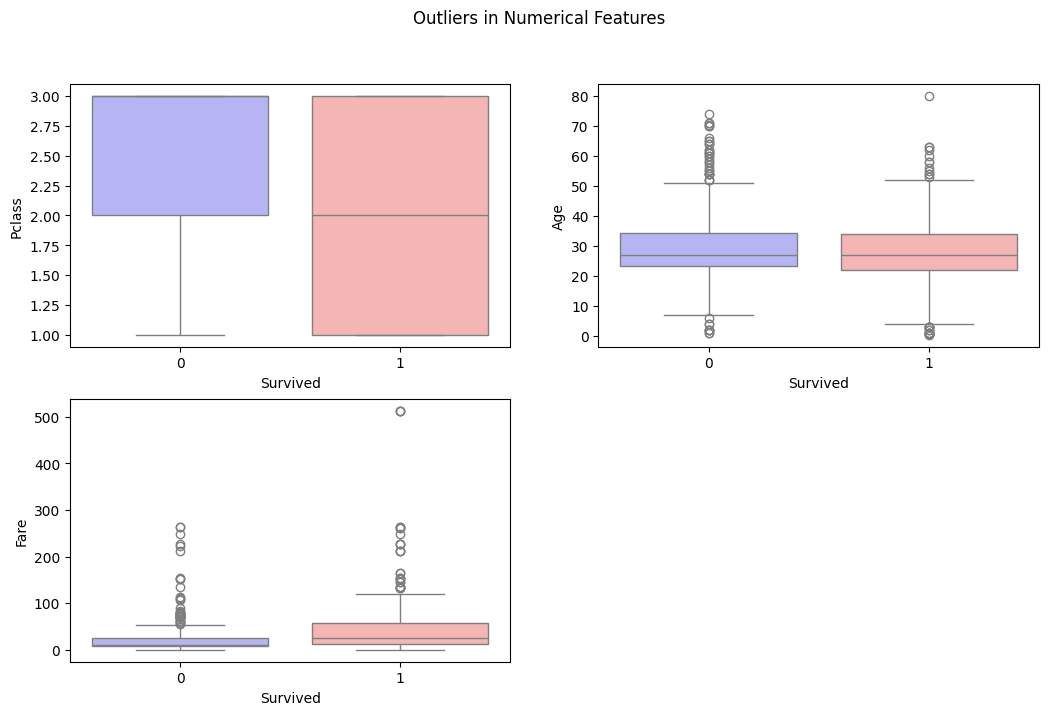

In [25]:
# Visualize outliers in numerical features
fig, axes = plt.subplots(2, 2, figsize=(12.5, 7.5))
fig.suptitle("Outliers in Numerical Features")
fig.delaxes(axes[1][1])

sns.boxplot(ax=axes[0, 0], data=df, x="Survived", y="Pclass", palette="bwr")
sns.boxplot(ax=axes[0, 1], data=df, x="Survived", y="Age", palette="bwr")
sns.boxplot(ax=axes[1, 0], data=df, x="Survived", y="Fare", palette="bwr")

In [26]:
# Encode categorical features: 'Sex' and 'Embarked'
df["Sex"] = df["Sex"].map({"female": 0, "male": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

<Axes: xlabel='Survived', ylabel='Embarked'>

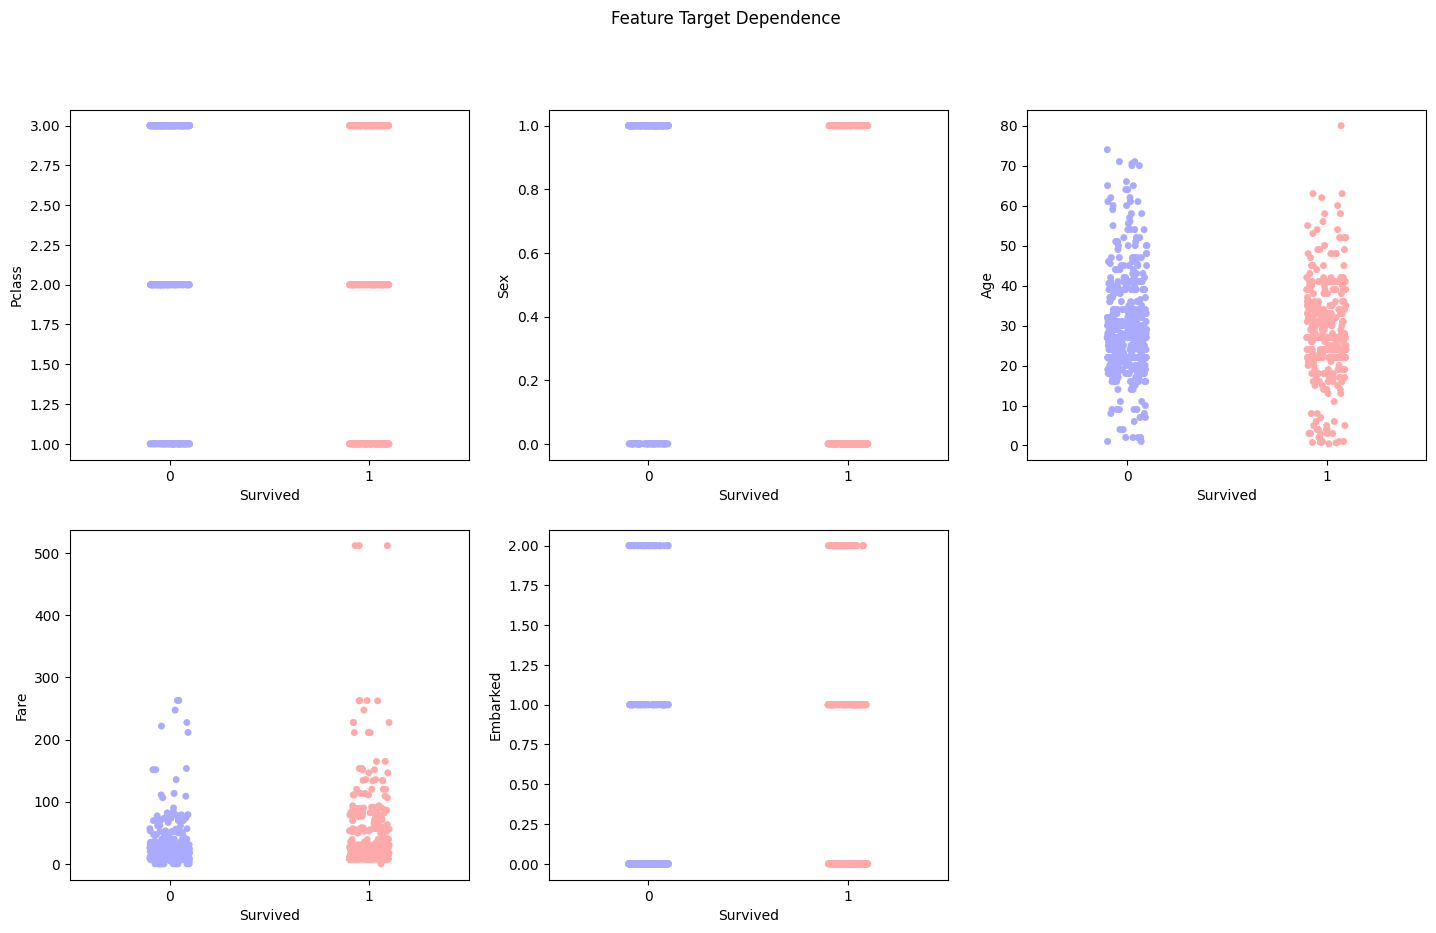

In [27]:
# Display feature-target dependence
fig, axes = plt.subplots(2, 3, figsize=(17.5, 10))
fig.delaxes(axes[1][2])
fig.suptitle("Feature Target Dependence")

sns.stripplot(ax=axes[0, 0], data=df, x="Survived", y="Pclass", palette="bwr")
sns.stripplot(ax=axes[0, 1], data=df, x="Survived", y="Sex", palette="bwr")
sns.stripplot(ax=axes[0, 2], data=df, x="Survived", y="Age", palette="bwr")
sns.stripplot(ax=axes[1, 0], data=df, x="Survived", y="Fare", palette="bwr")
sns.stripplot(ax=axes[1, 1], data=df, x="Survived", y="Embarked", palette="bwr")

In [29]:
# Feature and target split
X = df.drop(columns=["Survived"])
y = df["Survived"]

# Display features and target
print("Features:\n", X.head())
print("Target:\n", y.head())

Features:
    Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  22.0      1      0   7.2500         0
1       1    0  38.0      1      0  71.2833         1
2       3    0  26.0      0      0   7.9250         0
3       1    0  35.0      1      0  53.1000         0
4       3    1  35.0      0      0   8.0500         0
Target:
 0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [30]:
# Train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

# Display shapes of train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (622, 7)
Shape of y_train: (622,)
Shape of X_test: (89, 7)
Shape of y_test: (89,)


In [40]:
import pandas as pd

class DecisionTree:
    def __init__(self, max_depth=5, min_samples_leaf=5):
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf

    def fit(self, X_train, y_train):
        # Combine X_train and y_train into one DataFrame for easier processing
        df_train = pd.DataFrame(X_train)
        df_train['Survived'] = y_train
        self.tree = self._build_tree(df_train, depth=0)

    def _calculate_gini(self, groups, classes):
        # Calculate Gini impurity for a split
        n_instances = sum(len(group) for group in groups)
        gini = 0.0
        for group in groups:
            size = len(group)
            if size == 0:
                continue
            score = 0.0
            for class_val in classes:
                p = (group['Survived'] == class_val).sum() / size
                score += p * p
            gini += (1.0 - score) * (size / n_instances)
        return gini

    def _get_split(self, df):
        # Find the best split point for a dataset
        class_values = df['Survived'].unique()
        b_index, b_value, b_score, b_groups = 999, 999, 999, None
        for index in range(len(df.columns) - 1):  # Exclude the target column
            for row in df.itertuples(index=False):
                groups = self._split(index, row[index], df)
                gini = self._calculate_gini(groups, class_values)
                if gini < b_score:
                    b_index, b_value, b_score, b_groups = index, row[index], gini, groups
        return {'index': b_index, 'value': b_value, 'groups': b_groups}

    def _split(self, index, value, df):
        # Split a dataset based on an attribute and attribute value
        left = df[df.iloc[:, index] < value]
        right = df[df.iloc[:, index] >= value]
        return left, right

    def _to_terminal(self, group):
        # Create a terminal node value
        return group['Survived'].mode()[0]

    def _split_node(self, node, depth):
        # Split the dataset to make child nodes
        left, right = node['groups']
        del node['groups']
        if left.empty or right.empty:
            node['left'] = node['right'] = self._to_terminal(left.append(right))
            return
        if depth >= self.max_depth:
            node['left'], node['right'] = self._to_terminal(left), self._to_terminal(right)
            return
        if len(left) <= self.min_samples_leaf:
            node['left'] = self._to_terminal(left)
        else:
            node['left'] = self._get_split(left)
            self._split_node(node['left'], depth + 1)
        if len(right) <= self.min_samples_leaf:
            node['right'] = self._to_terminal(right)
        else:
            node['right'] = self._get_split(right)
            self._split_node(node['right'], depth + 1)

    def _build_tree(self, df, depth):
        # Build the decision tree recursively
        root = self._get_split(df)
        self._split_node(root, depth)
        return root

    def _predict(self, node, row):
        # Make a prediction with a decision tree
        if row[node['index']] < node['value']:
            if isinstance(node['left'], dict):
                return self._predict(node['left'], row)
            else:
                return node['left']
        else:
            if isinstance(node['right'], dict):
                return self._predict(node['right'], row)
            else:
                return node['right']

    def predict(self, X_test):
        # Make predictions for test data
        predictions = []
        df_test = pd.DataFrame(X_test)
        for row in df_test.itertuples(index=False):
            prediction = self._predict(self.tree, row)
            predictions.append(prediction)
        return predictions

# Feature selection
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = df['Survived']

# Create and train the decision tree classifier
tree_classifier = DecisionTree(max_depth=5, min_samples_leaf=5)
tree_classifier.fit(X_train, y_train)

# Make predictions
predictions = tree_classifier.predict(X_train)

# Print predictions or evaluate further
print(predictions)


[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 

In [41]:
def confusion_matrix(actual, predicted, classes):

    matrix = {class_label: {class_label: 0 for class_label in classes} for class_label in classes}
    for a, p in zip(actual, predicted):
        matrix[a][p] += 1
    return matrix

def accuracy_score(actual, predicted):

    correct = sum(1 for a, p in zip(actual, predicted) if a == p)
    return correct / len(actual)

def classification_report(actual, predicted, classes):

    report = {'precision': {}, 'recall': {}, 'f1-score': {}, 'support': {}}
    matrix = confusion_matrix(actual, predicted, classes)
    for class_label in classes:
        # Precision
        precision = matrix[class_label][class_label] / sum(matrix[pred][class_label] for pred in classes)
        report['precision'][class_label] = precision
        # Recall
        recall = matrix[class_label][class_label] / sum(matrix[class_label][pred] for pred in classes)
        report['recall'][class_label] = recall
        # F1-score
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
        report['f1-score'][class_label] = f1_score
        # Support
        report['support'][class_label] = sum(matrix[class_label].values())
    return report

# Compute and print evaluation metrics
classes = set(y_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions, classes))
print("Accuracy:", accuracy_score(y_test, predictions)*100 )
print("Classification Report:")
print(classification_report(y_test, predictions, classes))

Confusion Matrix:
{0: {0: 37, 1: 16}, 1: {0: 27, 1: 9}}
Accuracy: 51.68539325842697
Classification Report:
{'precision': {0: 0.578125, 1: 0.36}, 'recall': {0: 0.6981132075471698, 1: 0.25}, 'f1-score': {0: 0.6324786324786325, 1: 0.29508196721311475}, 'support': {0: 53, 1: 36}}


#Q2.

In [2]:
# Importing the dataframe
url = 'https://raw.githubusercontent.com/devzohaib/Simple-Linear-Regression/master/tvmarketing.csv'

df2 = pd.read_csv(url)
print(df2.shape)
df2.head()

(200, 2)


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [3]:
# X = TV, Y = Sales

# Calculating the mean of both the data sets
x2_avg = np.mean(df2['TV'])
y2_avg = np.mean(df2['Sales'])

# Calculating the standard deviations of the datasets
x2_sd = np.std(df2['TV'])
y2_sd = np.std(df2['Sales'])

print('The mean of TV is : ', x2_avg)
print('The mean of Sales is : ', y2_avg)
print('The SD of TV is : ', x2_sd)
print('The SD of Sales is : ', y2_sd)

The mean of TV is :  147.0425
The mean of Sales is :  14.0225
The SD of TV is :  85.63933175679269
The SD of Sales is :  5.204396578855228


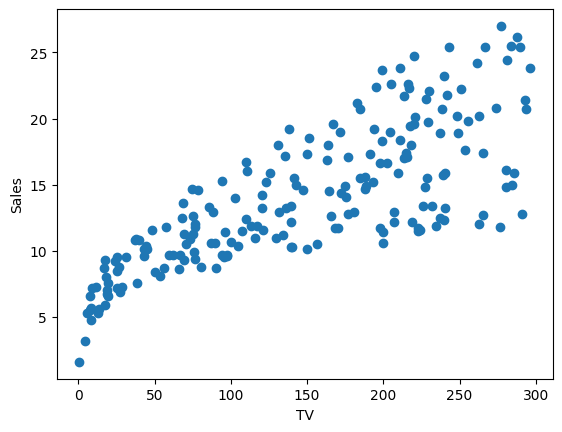

In [4]:
# Plotting the data frame
plt.xlabel("TV")
plt.ylabel("Sales")
plt.scatter(df2['TV'], df2['Sales'])
plt.show()

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


As per above data, there is no null value present in the dataset . Thus, no need to handle null values (NaN).

In [6]:
# Normalizing the data
sales_min = np.min(df2['Sales'])

sales_max = np.max(df2['Sales'])

df2['Sales'] = (df2['Sales'] - sales_min) / (sales_max - sales_min)
df2['TV'] = df2['TV'] / 100

df2.head()

,TV,Sales
0,2.301,0.807087
1,0.445,0.346457
2,0.172,0.303150
3,1.515,0.665354
4,1.808,0.444882


In [7]:
train_length = int(0.8 * len(df2))

train = df2[:train_length]
test = df2[train_length:]

In [8]:
# Defining the Regression function
def lin_reg(x, y):
  learning_Rate = 0.01
  epochs = 1000
  x = np.array(x)
  y = np.array(y)
  n = len(x)

  # Initializing the parameters as 0
  m = 0
  c = 0

  for i in range((epochs)):
    y_pred = m * x + c
    gradc = -(2/ n) * np.sum((y - y_pred))
    gradm = -(2/ n) * np.sum((y - y_pred) * x)

    m = m - learning_Rate * gradm
    c = c - learning_Rate * gradc

  return m, c
slope, intercept = lin_reg(train['TV'], train['Sales'])
print('Slope : ', slope)
print('Y intercept : ', intercept)

Slope :  0.19342323992749325
Y intercept :  0.21393486127119452


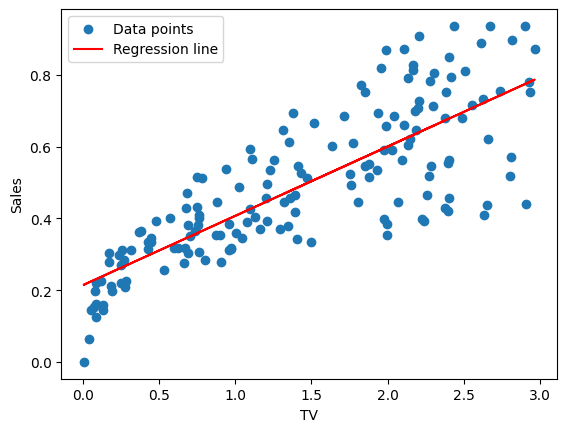

In [9]:
# Plotting the data and the learned regression line
plt.scatter(train['TV'], train['Sales'], label='Data points')
plt.plot(train['TV'], intercept + slope * np.array(train['TV']), color='red', label='Regression line')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [10]:
# Assuming y_true is the actual Sales values in the test set and y_pred is the predicted Sales values
y_true = test['Sales']
y_pred = slope * test['TV'] + intercept

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Mean Squared Error
mse = mean_squared_error(test['Sales'], y_pred)
print("Mean Squared Error:", mse)

# Absolute Error
absolute_error = np.mean(np.abs(test['Sales'] - y_pred))
print("Absolute Error:", absolute_error)

Mean Squared Error: 0.02190715365812915
Absolute Error: 0.12121283587490532


#Q3.

In [11]:
# Correct URL for the Boston Housing dataset in CSV format
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"

# Column names for the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Read the dataset into a Pandas DataFrame
df_3 = pd.read_csv(data_url, sep='\s+', header=None, names=column_names)

# Display the first few rows of the DataFrame
df_3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


 Variables in order:

 CRIM     per capita crime rate by town

 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.

 INDUS    proportion of non-retail business acres per town

 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

 NOX      nitric oxides concentration (parts per 10 million)

 RM       average number of rooms per dwelling

 AGE      proportion of owner-occupied units built prior to 1940

 DIS      weighted distances to five Boston employment centres

 RAD      index of accessibility to radial highways

 TAX      full-value property-tax rate per $10,000

 PTRATIO  pupil-teacher ratio by town

 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

 LSTAT    % lower status of the population

 MEDV     Median value of owner-occupied homes in $1000's

In [3]:
df_3.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
for name in column_names:
  df_3[name].fillna(value = df_3[name].mean(), inplace = True)
df_3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<Axes: >

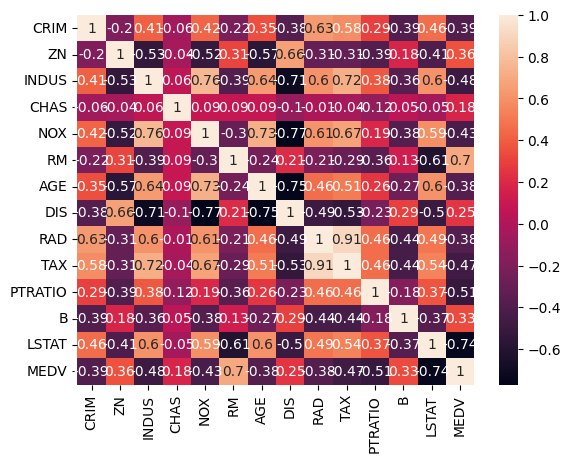

In [13]:
correlation_matrix = df_3.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

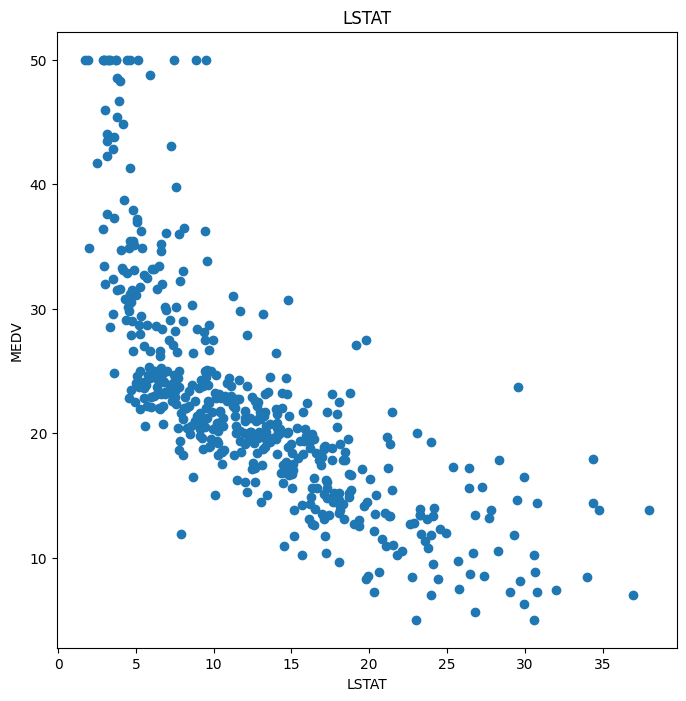

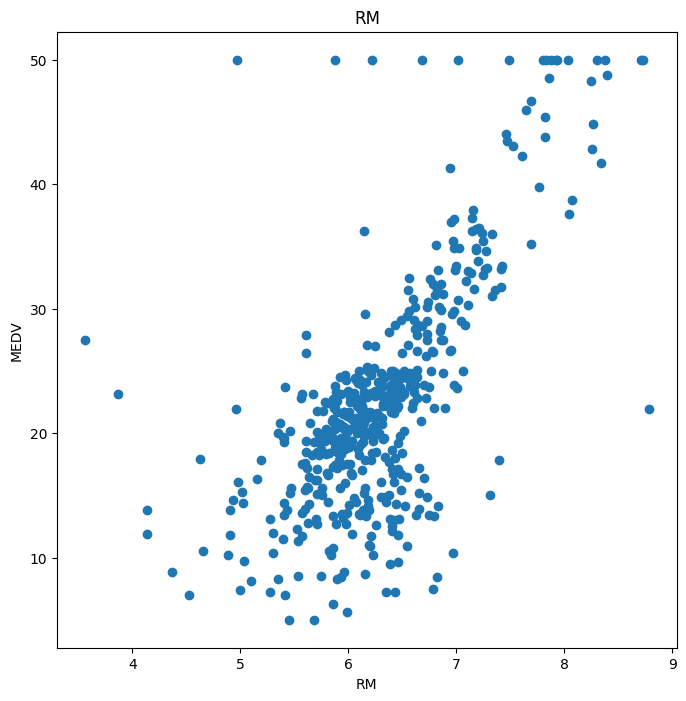

In [24]:
import matplotlib.pyplot as plt

features = ['LSTAT', 'RM']
target = df_3['MEDV']

for i, col in enumerate(features):
    plt.figure(figsize=(8, 8))
    x = df_3[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

plt.show()

In [14]:
from sklearn.model_selection import train_test_split

# Assuming 'df_3' contains your entire dataset
features = df_3.drop('MEDV', axis=1)
target = df_3['MEDV']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Display the lengths of the training and testing sets
print("Training set length:", len(X_train))
print("Testing set length:", len(X_test))

Training set length: 404
Testing set length: 102


Epoch 0, Mean Squared Error: 582.4086
Epoch 200, Mean Squared Error: 22.7247
Epoch 400, Mean Squared Error: 22.0373
Epoch 600, Mean Squared Error: 21.8231
Epoch 800, Mean Squared Error: 21.7368
Mean Squared Error on Test Set: 24.7310


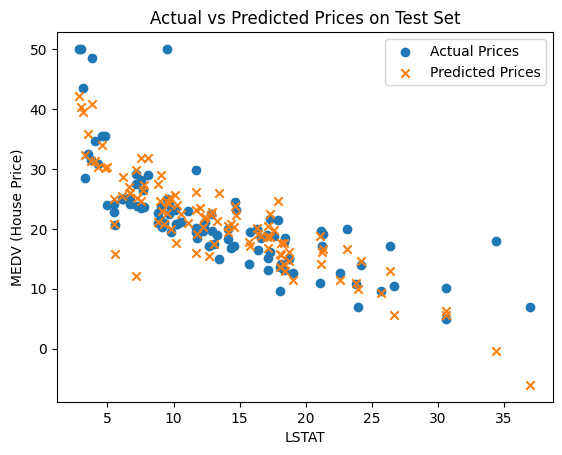

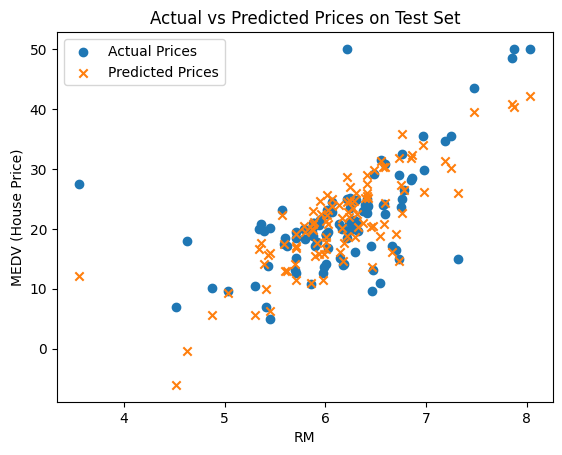

In [20]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.mse_history = []

    def fit(self, X, y):
        # Add a column of ones to X for the bias term
        X = np.c_[np.ones(X.shape[0]), X]

        # Initialize weights and bias with small random values
        self.weights = np.random.rand(X.shape[1])
        self.bias = np.random.rand()

        # Perform gradient descent
        for epoch in range(self.epochs):
            # Make predictions
            y_pred = self.predict(X)

            # Calculate errors
            errors = y_pred - y

            # Update weights and bias using gradient descent
            self.weights -= self.learning_rate * (2 / len(X)) * np.dot(X.T, errors)
            self.bias -= self.learning_rate * (2 / len(X)) * np.sum(errors)

            # Calculate MSE and store every epoch
            mse = np.mean(errors ** 2)
            self.mse_history.append(mse)

            # Print MSE every 200 epochs
            if epoch % 200 == 0:
                print(f'Epoch {epoch}, Mean Squared Error: {mse:.4f}')

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# 1. Feature Scaling
mean_X_train = np.mean(X_train, axis=0)
std_X_train = np.std(X_train, axis=0)

X_train_scaled = (X_train - mean_X_train) / std_X_train
X_test_scaled = (X_test - mean_X_train) / std_X_train

# 2. Train the Linear Regression Model
lr_model = LinearRegression(learning_rate=0.01, epochs=1000)
lr_model.fit(X_train_scaled, Y_train)

# 3. Evaluate the Model on the Test Set
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]
y_pred_test = lr_model.predict(X_test_scaled)

mse_test = np.mean((Y_test - y_pred_test) ** 2)
print(f'Mean Squared Error on Test Set: {mse_test:.4f}')

# 4. Visualize the Regression Line
plt.scatter(X_test['LSTAT'], Y_test, marker='o', label='Actual Prices')
plt.scatter(X_test['LSTAT'], y_pred_test, marker='x', label='Predicted Prices')
plt.title('Actual vs Predicted Prices on Test Set')
plt.xlabel('LSTAT')
plt.ylabel('MEDV (House Price)')
plt.legend()
plt.show()

plt.scatter(X_test['RM'], Y_test, marker='o', label='Actual Prices')
plt.scatter(X_test['RM'], y_pred_test, marker='x', label='Predicted Prices')
plt.title('Actual vs Predicted Prices on Test Set')
plt.xlabel('RM')
plt.ylabel('MEDV (House Price)')
plt.legend()
plt.show()